In [1]:
# load packages
import os
import sys
import numpy as np
import itertools
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import manifold
import matplotlib.pyplot as plt

In [2]:
# load data
digits = datasets.load_digits(n_class=10)
X, y = digits.data, digits.target

In [3]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
y[0]

0

In [5]:
X[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [6]:
y[1]

1

In [7]:
# initiate k-means cluster wiht 2
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [8]:
kmeans.labels_ # labels

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [9]:
predictions = kmeans.predict(X)
predictions

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [10]:
# perform dimentionality reduction and take only 2 componets
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
x_tsne = tsne.fit_transform(X)

In [11]:
x_tsne

array([[ -2.888679,  57.7351  ],
       [ 27.26694 , -19.374847],
       [ 18.856754,  -8.129786],
       ...,
       [  9.873543, -12.694518],
       [-19.124634,  28.904827],
       [  2.801365,  -9.643776]], dtype=float32)

In [14]:
# initiate another k-means with 2 clusters
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(x_tsne) # cluster the dimentionally reduced clusters
kmeans2.labels_, kmeans2.predict(x_tsne)

(array([0, 0, 0, ..., 1, 1, 1], dtype=int32),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int32))

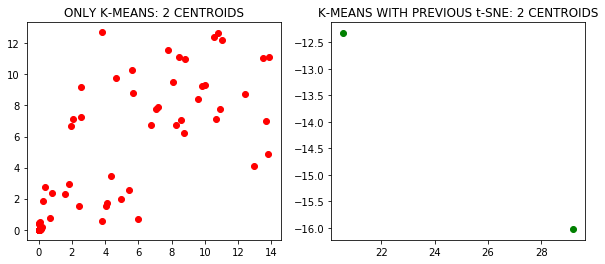

In [17]:
# plot clusters
fig = plt.figure(figsize=(10,4))

# figure 1
plt.subplot2grid((1,2), (0,0))
plt.title("ONLY K-MEANS: 2 CENTROIDS")
plt.scatter(kmeans.cluster_centers_[0], kmeans.cluster_centers_[1], color="red")

plt.subplot2grid((1,2), (0,1))
plt.title("K-MEANS WITH PREVIOUS t-SNE: 2 CENTROIDS")
plt.scatter(kmeans2.cluster_centers_[0], kmeans2.cluster_centers_[1],color="green")
plt.show()